In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na*")


data_file_paths = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        data_file_paths.append(file_path)


/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


# Data Cleaning


In [2]:
import pandas as pd


In [3]:
dataframes = []
for file_path in data_file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [4]:
original_data = pd.concat(dataframes, ignore_index=True)

In [5]:
data = original_data.copy()
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
print(data[" Label"].value_counts())

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [7]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

## Fixing column names

there are column names that start with space this will be removed

In [8]:
columns_map = {col: col.strip() for col in data.columns}

data.rename(columns = columns_map, inplace=True)

In [9]:
print(data["Label"].unique())
print(len(data["Label"].unique()))


['BENIGN' 'PortScan' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DDoS' 'Bot'
 'Infiltration' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed']
15


## Removing duplicates

In [10]:
duplicates = data.duplicated()
print(duplicates.sum())

data.drop_duplicates(inplace=True)
data.shape

308381


(2522362, 79)

In [11]:
data.shape

(2522362, 79)

In [12]:
import numpy as np

# Check for nulls
print("Null values per column:")
print(data.isna().sum()[data.isna().sum() > 0])

# Check for inf values
print("\nInf values per column:")
print((data == np.inf).sum()[ (data == np.inf).sum() > 0 ])
print("\n-Inf values per column:")
print((data == -np.inf).sum()[ (data == -np.inf).sum() > 0 ])


Null values per column:
Flow Bytes/s    353
dtype: int64

Inf values per column:
Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64

-Inf values per column:
Series([], dtype: int64)


Note that there are about 350 null values for the Flow Bytes/s feature. There are also some infinites in Flow Bytes/s and Flow Packets/s. The infintes will be removed and converted to null values. We will deal with missing values next. 


## Removing infintie values

In [13]:
# Replace infinity with NaN correctly


data["Flow Bytes/s"] = data["Flow Bytes/s"].replace([np.inf], np.nan)
data["Flow Packets/s"] = data["Flow Packets/s"].replace([np.inf], np.nan)


# Check for inf values
print("\nInf values per column:")
print((data == np.inf).sum()[ (data == np.inf).sum() > 0 ])
print("\n-Inf values per column:")
print((data == -np.inf).sum()[ (data == -np.inf).sum() > 0 ])



Inf values per column:
Series([], dtype: int64)

-Inf values per column:
Series([], dtype: int64)


## Dealing with missing values

Although the number of missing values is small relative to the dataset size, we’ll first ensure that they are not concentrated within a specific label. In other words, we want to confirm that the missing values are spread across different attack types so that removing them won’t bias the dataset.

In [14]:
rows_with_nulls = data[data.isna().any(axis=1)]
labels_null_count = rows_with_nulls["Label"].value_counts()

# Counts of labels in the entire dataset
labels_total_count = data["Label"].value_counts()

# Create comparison table
comparison = pd.DataFrame({
    'Total Count': labels_total_count,
    'Null Count': labels_null_count
})

# Fill missing values with 0 (labels that have no nulls)
comparison['Null Count'] = comparison['Null Count'].fillna(0).astype(int)
comparison["percent missing"] = comparison["Null Count"]/comparison["Total Count"] * 100
comparison

,Total Count,Null Count,percent missing
Label,,,
BENIGN,2096484,1427,0.068066
Bot,1953,5,0.256016
DDoS,128016,2,0.001562
DoS GoldenEye,10286,0,0.000000
DoS Hulk,172849,3,0.001736
DoS Slowhttptest,5228,0,0.000000
DoS slowloris,5385,0,0.000000
FTP-Patator,5933,2,0.033710
Heartbleed,11,0,0.000000


Notice that the null values are distriubted over different features. They also take less than 1% of each feature. Therefore, we can safely drop the null values. 

In [15]:
data.dropna(inplace=True)

## Class Distribution

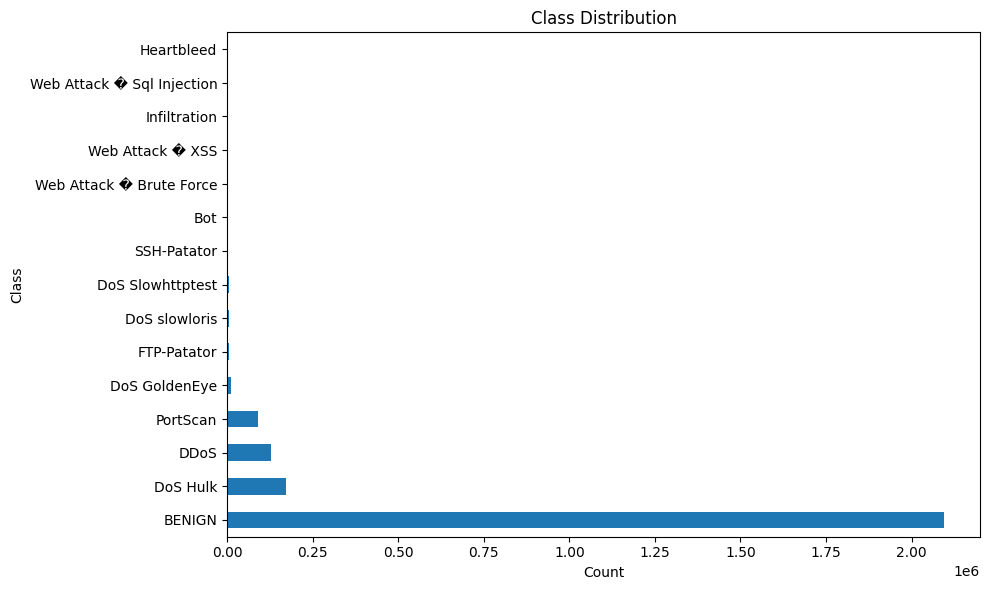

,Count,Percentage (%)
Label,,
BENIGN,2095057,83.11
DoS Hulk,172846,6.86
DDoS,128014,5.08
PortScan,90694,3.60
DoS GoldenEye,10286,0.41
FTP-Patator,5931,0.24
DoS slowloris,5385,0.21
DoS Slowhttptest,5228,0.21
SSH-Patator,3219,0.13


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = data['Label'].value_counts()
class_percentage = data['Label'].value_counts(normalize=True) * 100

# Create a table with counts and percentages
distribution_table = pd.DataFrame({
    'Count': class_counts,
    'Percentage (%)': class_percentage.round(2)
})

# Sort by counts descending
distribution_table = distribution_table.sort_values('Count', ascending=False)



# Visualize as a horizontal bar chart for better readability with imbalanced data
plt.figure(figsize=(10, max(6, len(class_counts) * 0.4)))
distribution_table['Count'].plot(kind='barh')
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()
plt.show()
distribution_table


Note that there is a massive imbalance in the classes, with benign taking 83% of the data. Also note that there classes with very low number of rows compared to the entire dataset and these might have to be dropped.


Before dealing with the class imbalance in the dataset, we could make it a bit better by combining attaks of the same type into one class. This will lead to better training with a lesser chance of overfitting while still classifying attacks based on their type. 



In [17]:
data["Label"].unique()

array(['BENIGN', 'PortScan', 'Web Attack � Brute Force',
       'Web Attack � XSS', 'Web Attack � Sql Injection', 'FTP-Patator',
       'SSH-Patator', 'DDoS', 'Bot', 'Infiltration', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed'],
      dtype=object)

## Grouping attacks of the same type together

In [18]:
attack_type_map = {
    'BENIGN': "BENIGN",
    
    # DoS Attacks
    'DoS Hulk': "DoS",
    'DoS GoldenEye': "DoS",
    'DoS slowloris': "DoS",
    'DoS Slowhttptest': "DoS",
    
    # DDoS Attacks
    'DDoS': "DDoS",
    
    # Port Scan Attacks
    'PortScan': "PortScan",
    
    # Brute Force Attacks
    'FTP-Patator': "Brute Force",
    'SSH-Patator': "Brute Force",
    
    
    # Web Attacks
    'Web Attack � Brute Force': "Web Attack",
    'Web Attack � Brute Force': "Web Attack",
    'Web Attack � XSS': "Web Attack",
    'Web Attack � Sql Injection': "Web Attack",
    
    # Other Attacks
    'Bot': "Bot",
    
    'Infiltration': "Exploits",
    'Heartbleed': "Exploits"
}


In [19]:
# Apply the transformation
data['Attack_Type'] = data['Label'].map(attack_type_map)
data.drop(columns = "Label", inplace=True)

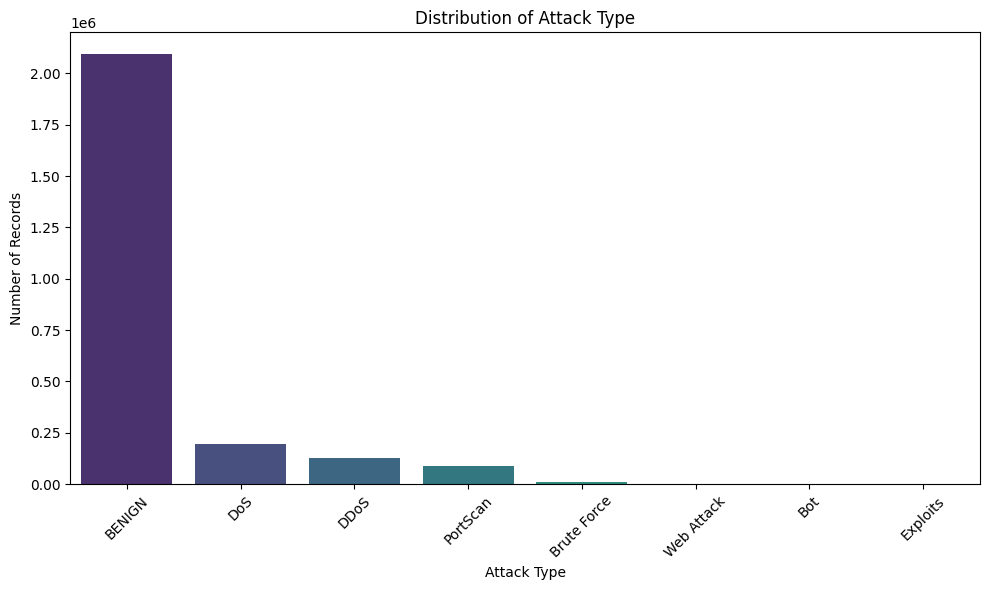

,Attack_Type,Count,Percentage (%)
0,BENIGN,"2,095,057",83.11
1,DoS,"193,745",7.69
2,DDoS,"128,014",5.08
3,PortScan,"90,694",3.60
4,Brute Force,"9,150",0.36
5,Web Attack,"2,143",0.09
6,Bot,"1,948",0.08
7,Exploits,47,0.00


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the instances of each group
group_counts = data['Attack_Type'].value_counts().reset_index()
group_counts.columns = ['Attack_Type', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Attack_Type', y='Count', data=group_counts, palette='viridis')
plt.title('Distribution of Attack Type')
plt.ylabel('Number of Records')
plt.xlabel('Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


attack_type_distribution = data['Attack_Type'].value_counts().reset_index()
attack_type_distribution.columns = ['Attack_Type', 'Count']
attack_type_distribution['Percentage (%)'] = (attack_type_distribution['Count'] / attack_type_distribution['Count'].sum() * 100).round(2)

# Sort for readability
attack_type_distribution = attack_type_distribution.sort_values('Count', ascending=False).reset_index(drop=True)

# Display as styled table without hiding index
attack_type_distribution.style.set_caption("Attack Type Distribution")\
    .format({'Count': '{:,}', 'Percentage (%)': '{:.2f}'})\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center')]
    }])


## Dropping Expoits

the number of rows in expoits (originally heartbleed and infiltration) are too low compared to the dataset size. This might cause the model to overfit. It is very hard to deal with such massive imbalance without affecting the model performance. Therefore, this class will be dropped. 

In [21]:
data = data[data['Attack_Type'] != 'Exploits']

In [22]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack_Type
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Exploratory Data Analysis


## goals of EDA

The goal if the data exploration is the following:

1) Determine Which Features Are Most Important.

   
   The dimensionality of our dataset is high. We should investigate what features matter in the classification and what features don't matter that much for better model performance.

3) Identify any outliers and decide on how to deal with them. 

## Goal 1: Selecting Important features

### identifying colinear features and dealing with them

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


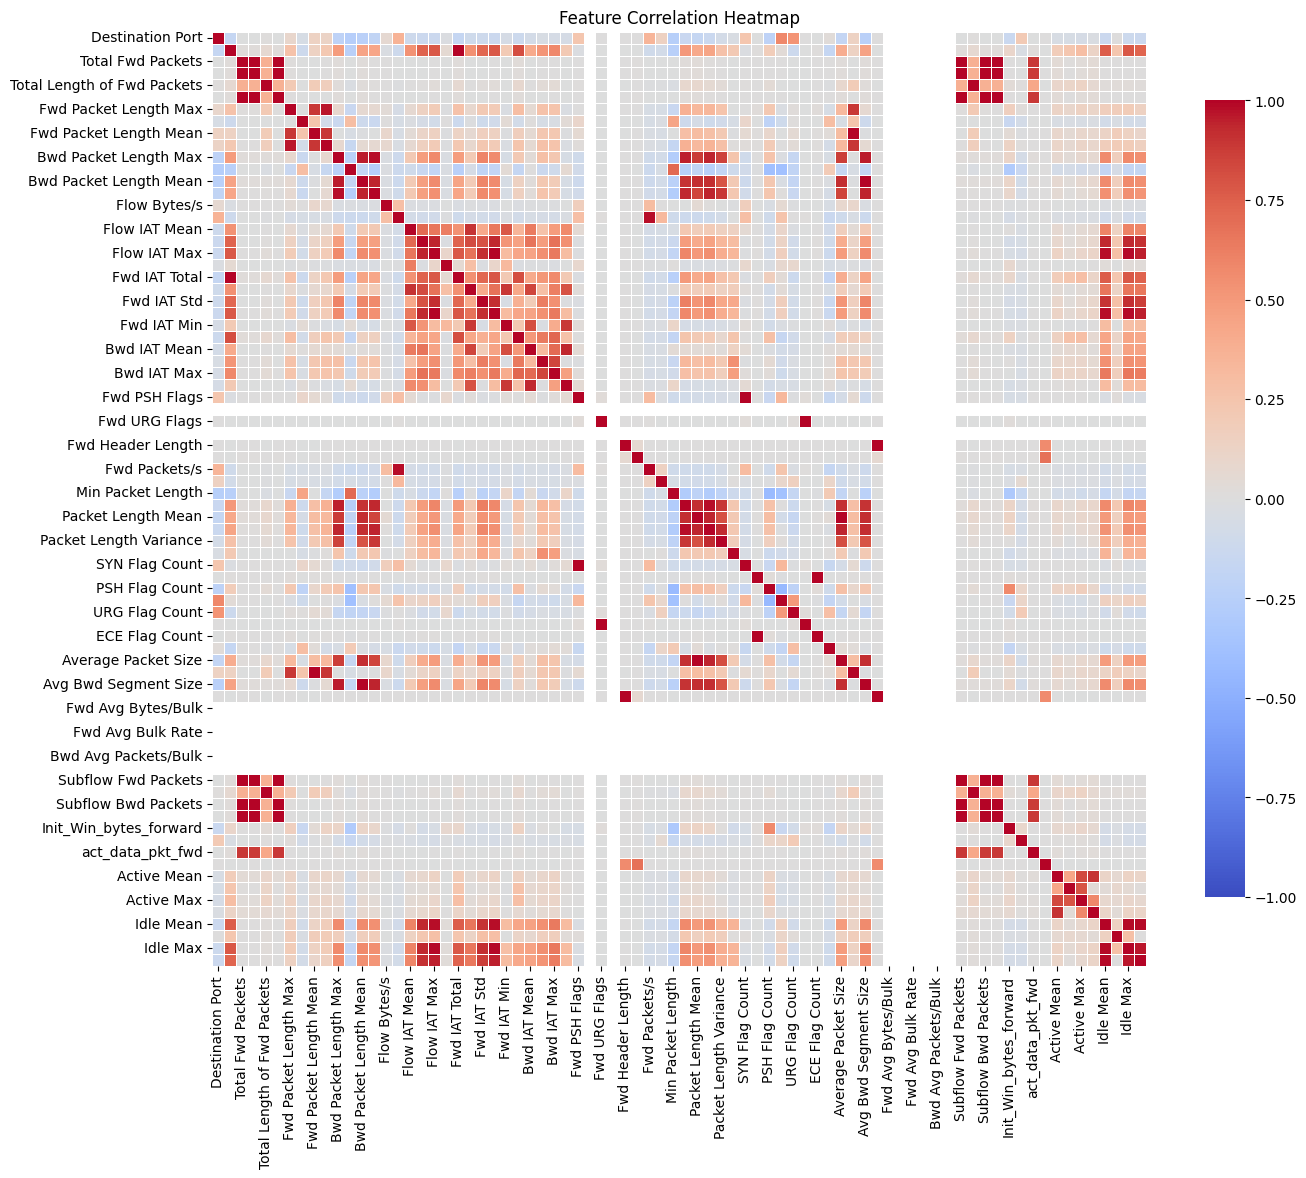

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data.drop(columns=['Attack_Type']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a heatmap
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    vmax=1.0,
    vmin=-1.0
)

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [24]:
print(data.nunique().sort_values(ascending=True))

Fwd Avg Bytes/Bulk            1
Bwd PSH Flags                 1
Fwd Avg Packets/Bulk          1
Fwd Avg Bulk Rate             1
Bwd Avg Bytes/Bulk            1
                         ...   
Bwd Packets/s           1107842
Flow IAT Mean           1166266
Fwd Packets/s           1220378
Flow Packets/s          1240118
Flow Bytes/s            1593862
Length: 79, dtype: int64


Notice that there are columns with constant value. These columns will not help in training the model and will be removed.

In [25]:
constant_features = data.columns[data.nunique() == 1]
data = data.drop(columns = constant_features)
data.shape

(2520751, 71)

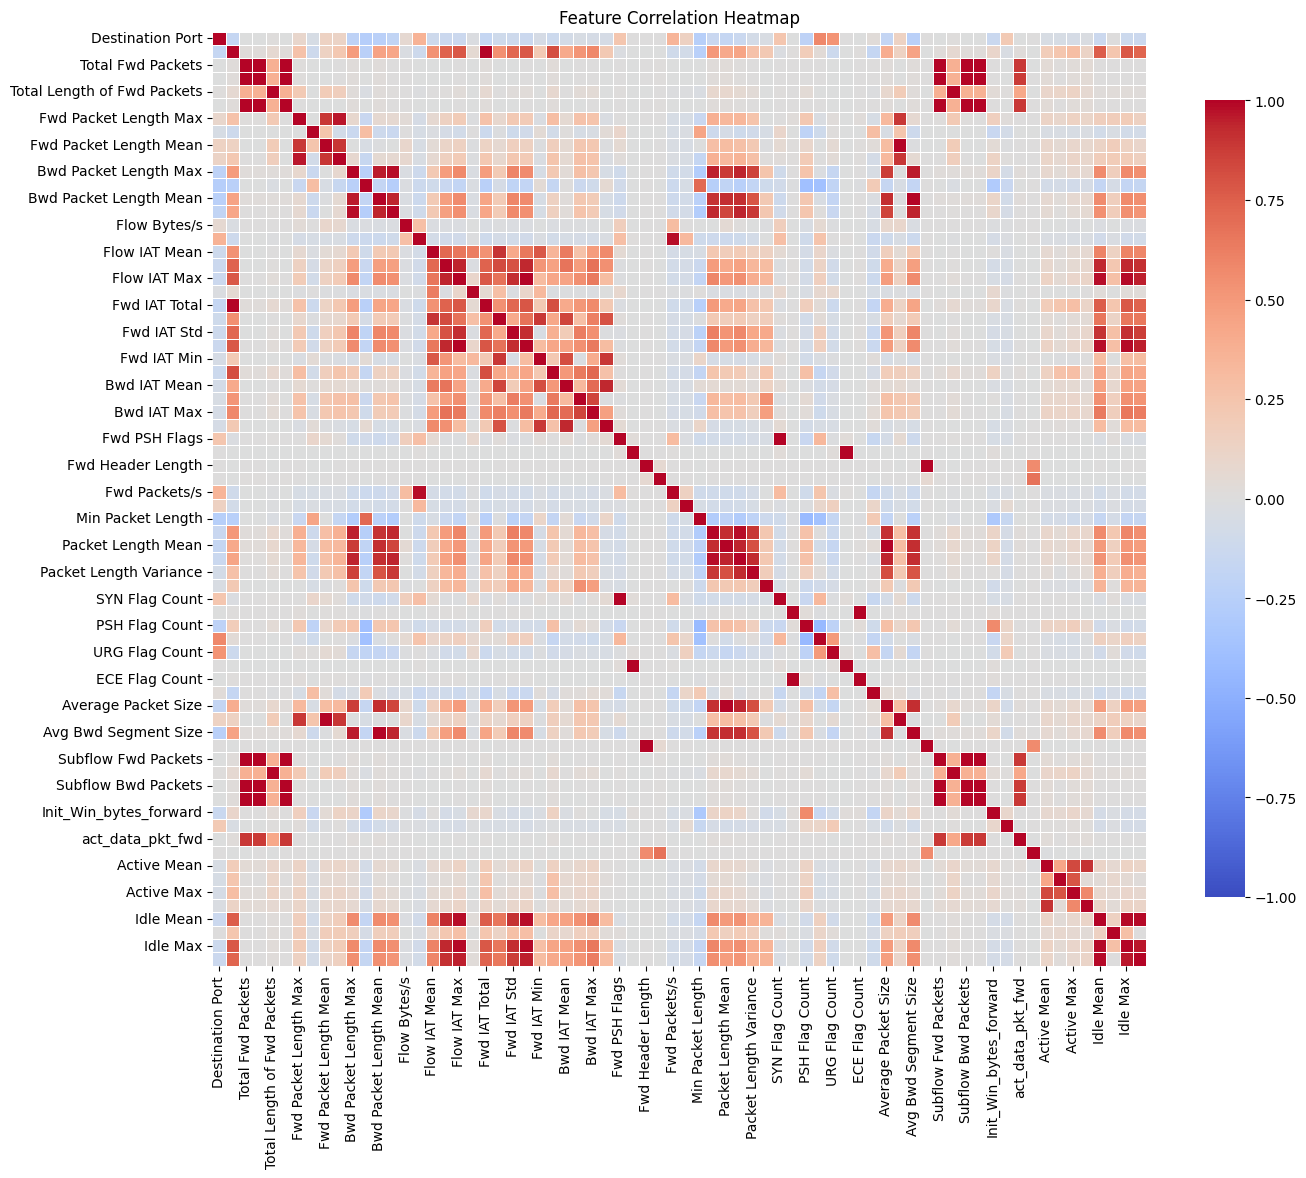

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data.drop(columns=['Attack_Type']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a heatmap
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    vmax=1.0,
    vmin=-1.0
)

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


Notice that there are features with very high co-linearity. We will drop features that have colinearity more that a threshold.

In [27]:
threashold = 0.9
just_drop_threashold = 0.95
columns = data.drop(columns=["Attack_Type"]).columns

# Calculate the correlation matrix once (major optimization)
correlation_matrix = data[columns].corr()

correlated_feature_pairs = []
columns_to_drop = []

# Use numpy operations for faster processing
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        feature1 = columns[i]
        feature2 = columns[j]
        correlation = correlation_matrix.loc[feature1, feature2]
        
        if correlation >= just_drop_threashold:
            if feature1 not in columns_to_drop:
                columns_to_drop.append(feature2)
        elif correlation >= threashold:
            correlated_feature_pairs.append((feature1, feature2, correlation))
        
for x, y, corr in correlated_feature_pairs:
    if x in columns_to_drop or y in columns_to_drop:
        continue
    print(f"feature [{x}] is correlated with feature [{y}]: \n[{corr}]")

feature [Bwd Packet Length Max] is correlated with feature [Max Packet Length]: 
[0.9472091579521704]
feature [Flow IAT Mean] is correlated with feature [Fwd IAT Mean]: 
[0.9018722738670076]
feature [Flow IAT Std] is correlated with feature [Flow IAT Max]: 
[0.9376228699649893]
feature [Flow IAT Max] is correlated with feature [Fwd IAT Std]: 
[0.9152850336042363]
feature [Bwd IAT Mean] is correlated with feature [Bwd IAT Min]: 
[0.9330523578371092]
feature [Max Packet Length] is correlated with feature [Packet Length Mean]: 
[0.9165118634633223]
feature [Active Mean] is correlated with feature [Active Min]: 
[0.9057359959108827]


There are features with near perfect correlation! We will remove features with correlation more than 0.97. We will investigate further, those with correlation more than 0.95.

In [28]:
data.drop(columns = columns_to_drop, inplace=True)
data.shape

(2520751, 48)

In [29]:
pairs_to_investigate = []
for x, y, corr in correlated_feature_pairs:
    if x in data.columns and y in data.columns:
        pairs_to_investigate.append((x, y))

print(pairs_to_investigate)

[('Bwd Packet Length Max', 'Max Packet Length'), ('Flow IAT Mean', 'Fwd IAT Mean'), ('Flow IAT Std', 'Flow IAT Max'), ('Flow IAT Max', 'Fwd IAT Std'), ('Bwd IAT Mean', 'Bwd IAT Min'), ('Max Packet Length', 'Packet Length Mean'), ('Active Mean', 'Active Min')]


/tmp/ipykernel_13/1881938729.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


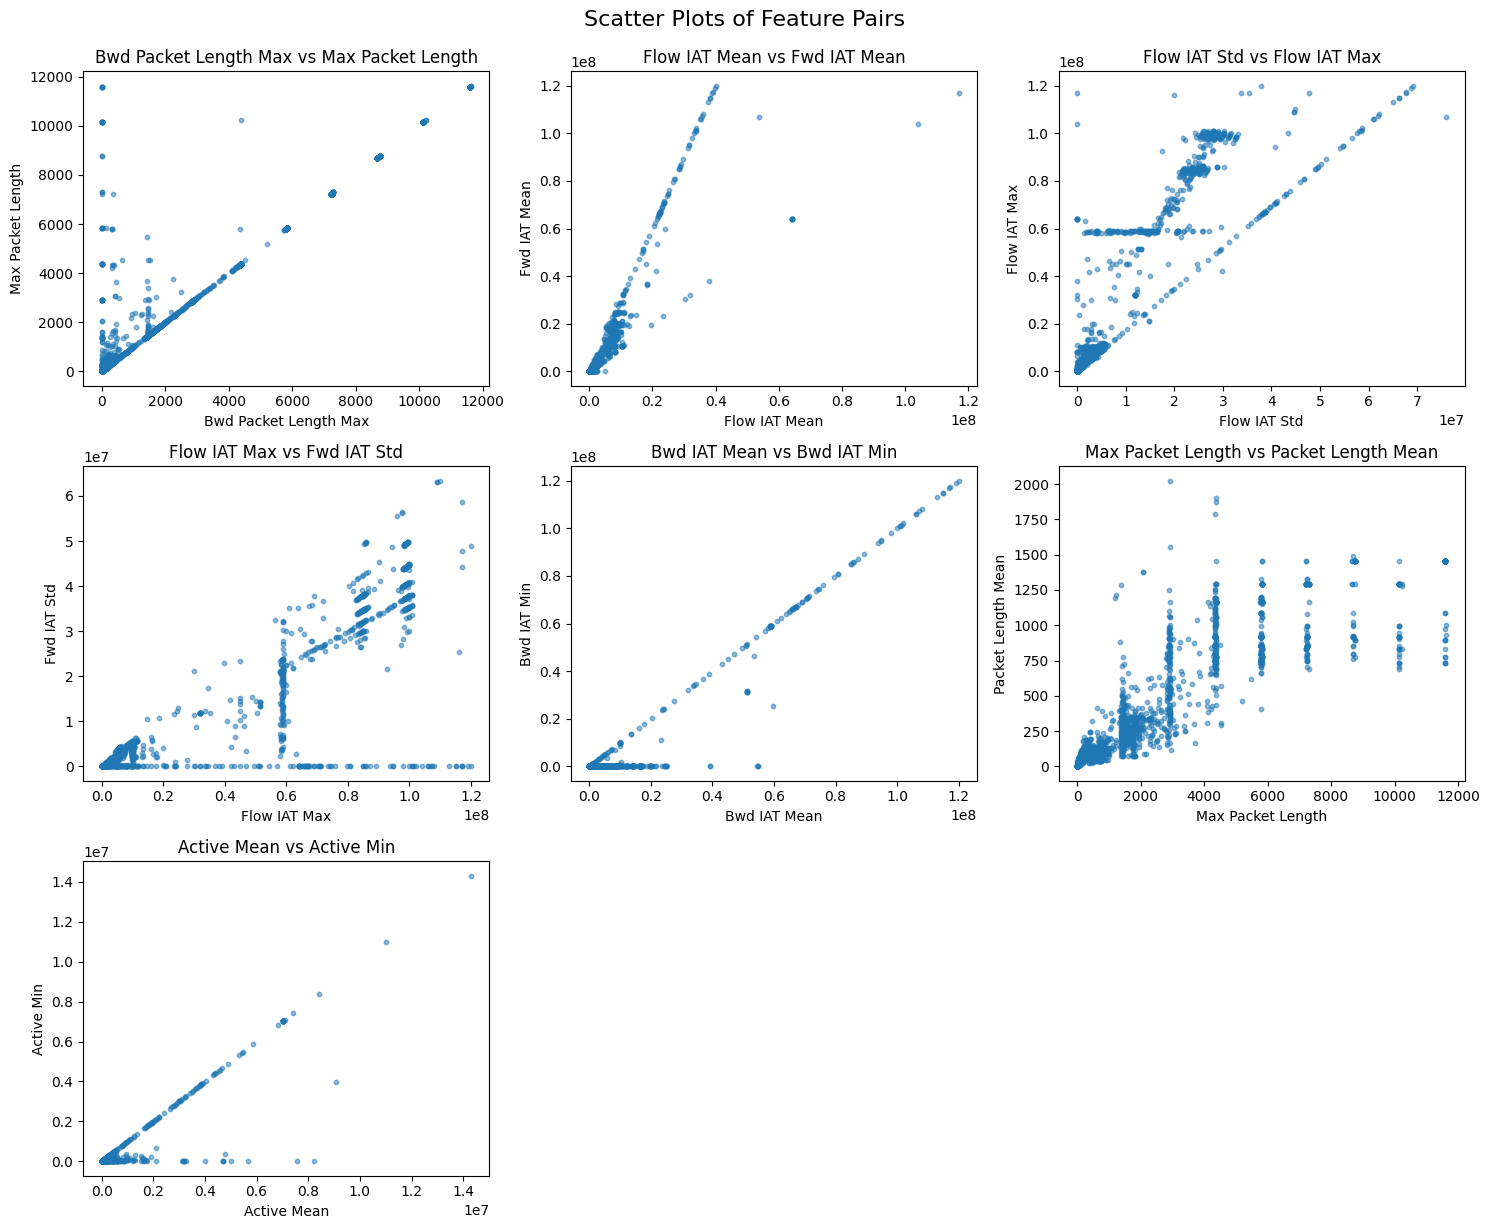

In [30]:
import matplotlib.pyplot as plt

def plot_feature_pairs(df, feature_pairs, hue=None, sample_size=5000):
    # Sample the data for performance
    df_sampled = df.sample(n=min(sample_size, len(df)), random_state=42)

    num_pairs = len(feature_pairs)
    ncols = 3  # You can adjust this
    nrows = (num_pairs + ncols - 1) // ncols

    plt.figure(figsize=(5 * ncols, 4 * nrows))

    for i, (feat_x, feat_y) in enumerate(feature_pairs):
        plt.subplot(nrows, ncols, i + 1)
        if hue:
            for label in df_sampled[hue].unique():
                subset = df_sampled[df_sampled[hue] == label]
                plt.scatter(subset[feat_x], subset[feat_y], label=label, alpha=0.5, s=10)
            plt.legend()
        else:
            plt.scatter(df_sampled[feat_x], df_sampled[feat_y], alpha=0.5, s=10)
        
        plt.xlabel(feat_x)
        plt.ylabel(feat_y)
        plt.title(f'{feat_x} vs {feat_y}')
        plt.tight_layout()

    plt.suptitle("Scatter Plots of Feature Pairs", fontsize=16, y=1.02)
    plt.show()


plot_feature_pairs(data, pairs_to_investigate)

Some features exhibit strong linear relationships, but there are also a few outliers. At this stage, we won’t drop any features, as these outliers could provide valuable signals for the model. We may revisit this decision later if needed.

In [31]:
features = data.drop(columns= ["Attack_Type"]).columns
print(features)
print(data.shape)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std'],
      d

The number of features reduced from 79 orignally to 48 features. For now we will stick with this. Based on the model result, we might filter down the features even more and select the most important ones. 

## Goal 2: understand the distributions and look for outliers

In [32]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Std
count,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,...,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06
mean,8.690744e+03,1.659032e+07,1.025880e+01,6.065243e+02,2.311993e+02,1.920377e+01,6.350189e+01,9.749253e+02,4.316019e+01,1.410733e+06,...,7.004516e-01,7.265707e+03,2.228741e+03,5.997266e+00,-3.082291e+03,9.152230e+04,4.616835e+04,1.719410e+05,6.542438e+04,5.656738e+05
std,1.901294e+04,3.523140e+07,7.943824e+02,1.011595e+04,7.563122e+02,6.079887e+01,1.955512e+02,2.038152e+03,7.088017e+01,2.657109e+07,...,6.956626e-01,1.459805e+04,8.924482e+03,6.743909e+02,1.149769e+06,6.858746e+05,4.161453e+05,1.084664e+06,6.106447e+05,4.873871e+06
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.610000e+08,...,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.200000e+01,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,1.194310e+02,...,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062000e+04,2.000000e+00,6.600000e+01,4.000000e+01,2.000000e+00,3.625000e+01,9.700000e+01,0.000000e+00,3.715049e+03,...,1.000000e+00,2.510000e+02,0.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.332968e+06,6.000000e+00,3.320000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.460000e+02,8.200000e+01,1.071429e+05,...,1.000000e+00,8.192000e+03,2.350000e+02,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,1.290000e+07,2.482000e+04,2.325000e+03,5.940857e+03,1.953000e+04,2.896000e+03,2.071000e+09,...,1.560000e+02,6.553500e+04,6.553500e+04,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,7.690000e+07


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Features only
X = data.drop(columns=['Attack_Type'])

In [34]:
def plot_boxplots(df, batch_size=10):
    cols = df.columns.tolist()
    for i in range(0, len(cols), batch_size):
        subset = cols[i:i+batch_size]
        df[subset].plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 6), sharey=False)
        plt.suptitle(f'Boxplots for Features {i+1} to {i+len(subset)}')
        plt.tight_layout()
        plt.show()

# --- Histograms with KDE ---
def plot_histograms(df, batch_size=10):
    cols = df.columns.tolist()
    for i in range(0, len(cols), batch_size):
        subset = cols[i:i+batch_size]
        n = len(subset)
        rows = 2
        cols_per_row = (n + 1) // 2 if n > 5 else n  # adjust layout
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 6))
        axes = axes.flatten() if n > 1 else [axes]

        for j, col in enumerate(subset):
            sns.histplot(df[col], kde=True, bins=30, ax=axes[j])
            axes[j].set_title(col)

        # Hide any unused subplots
        for j in range(n, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()


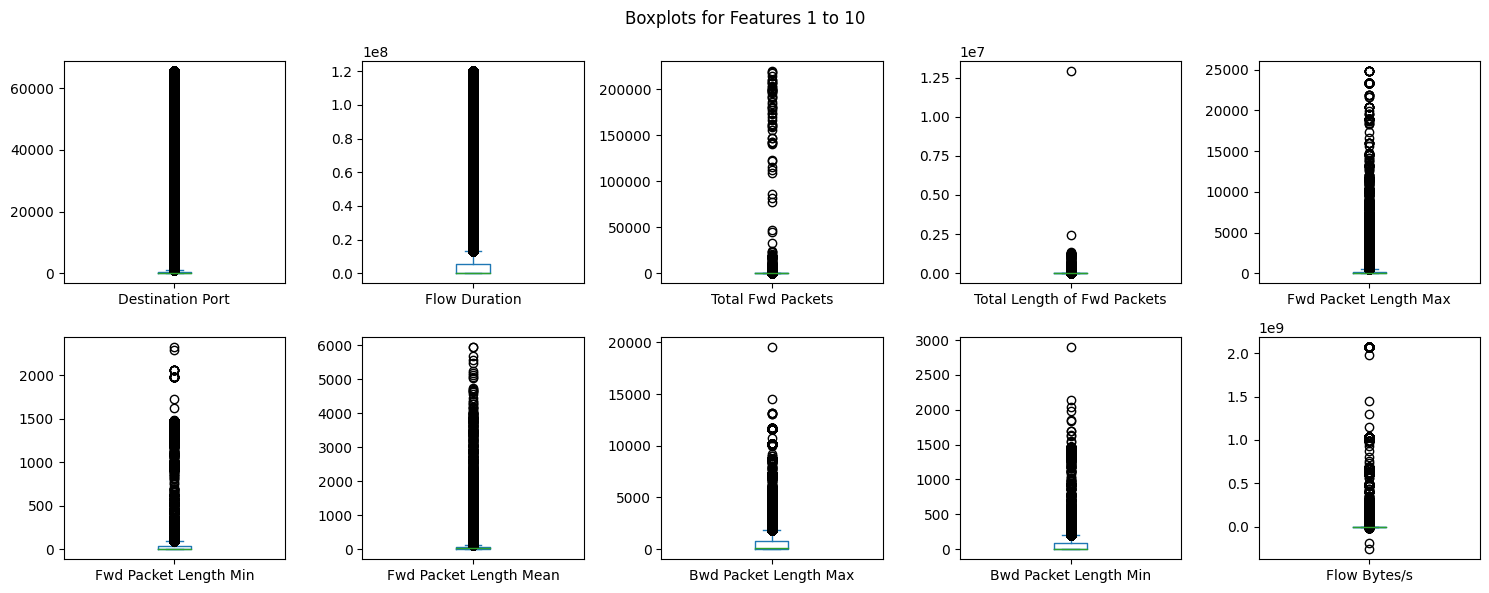

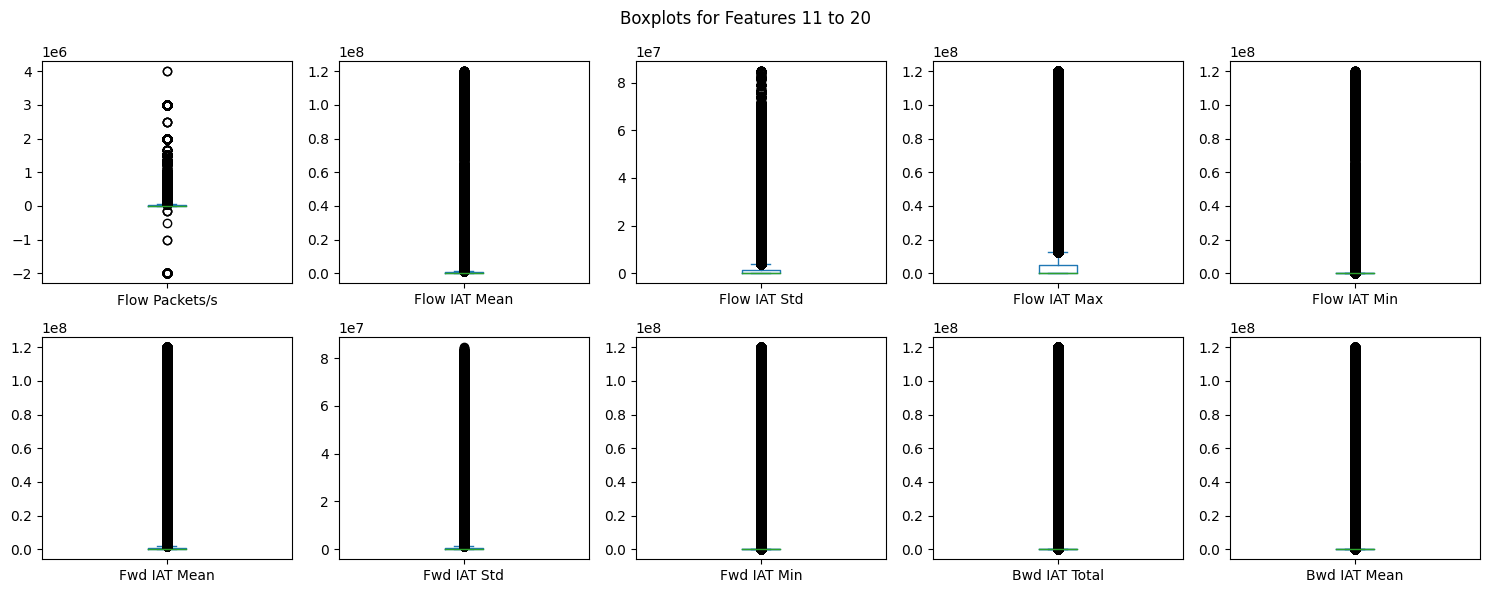

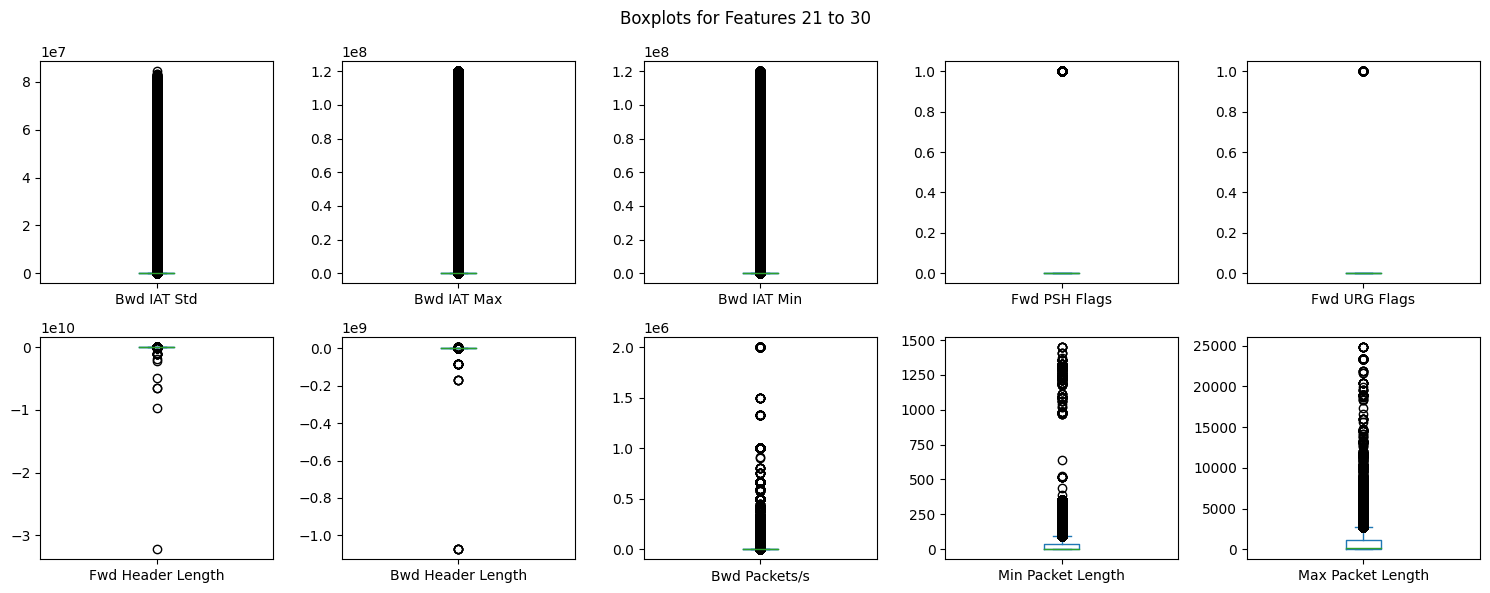

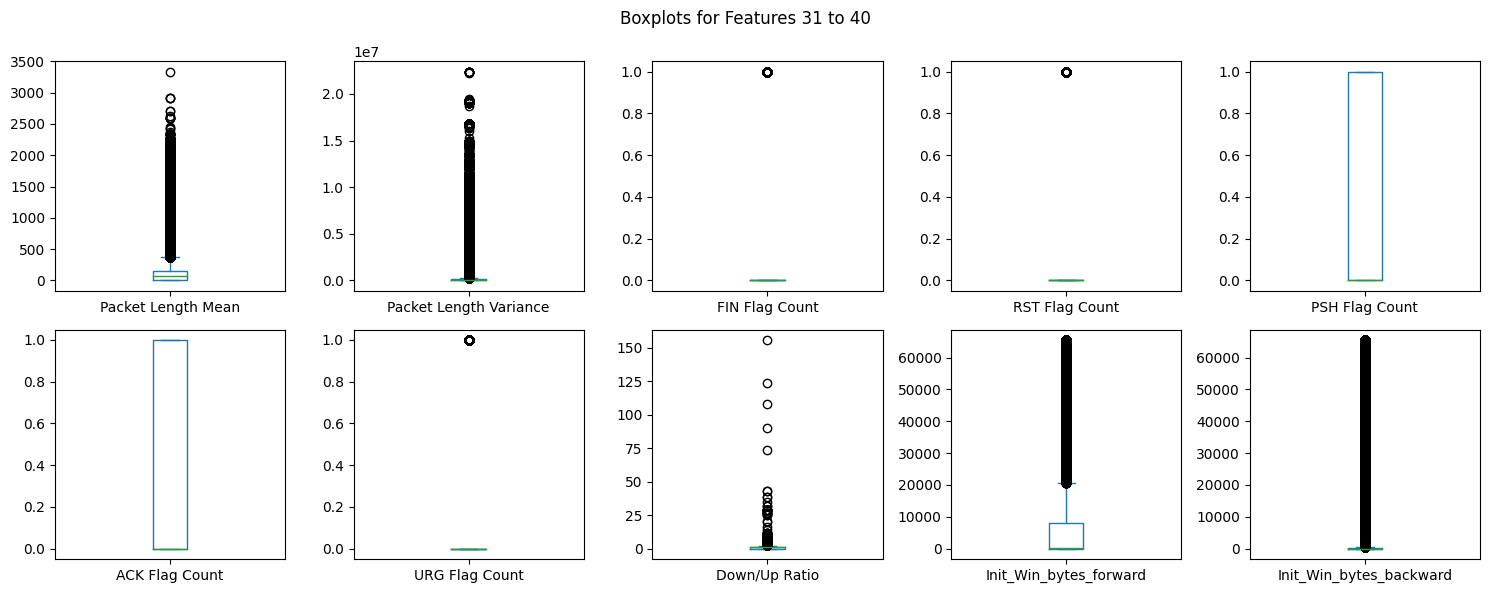

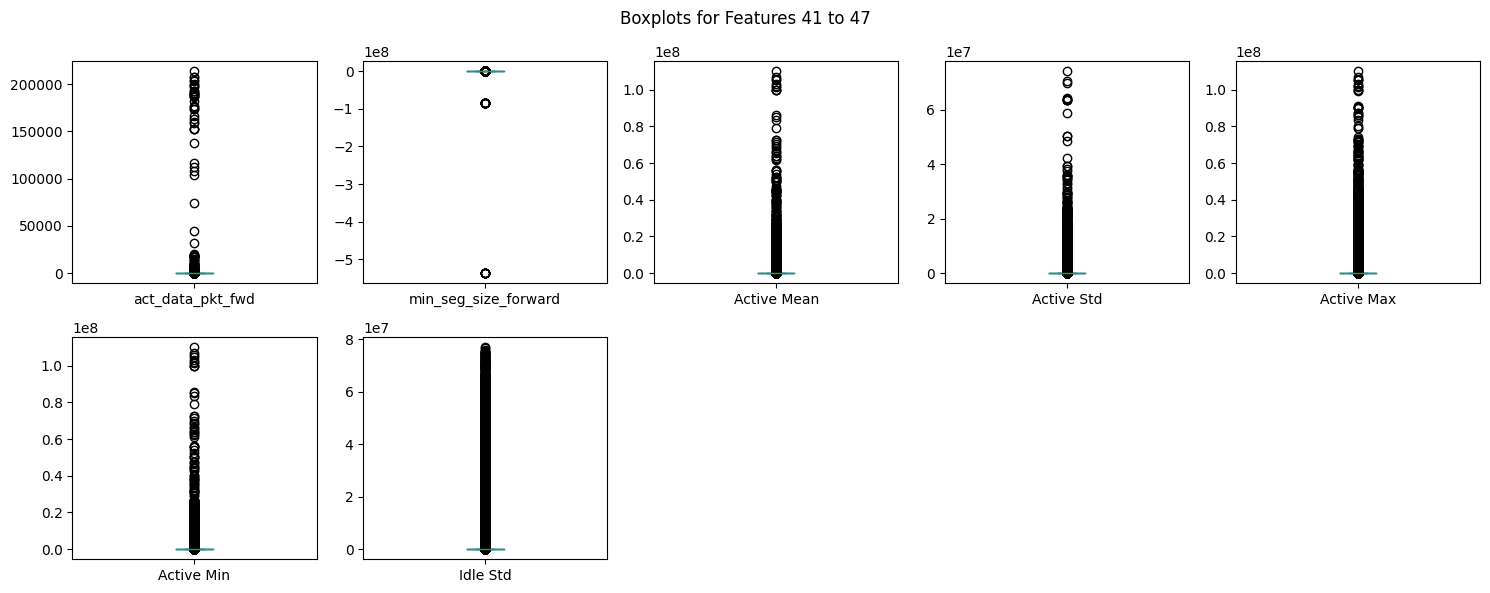

In [35]:
plot_boxplots(X)

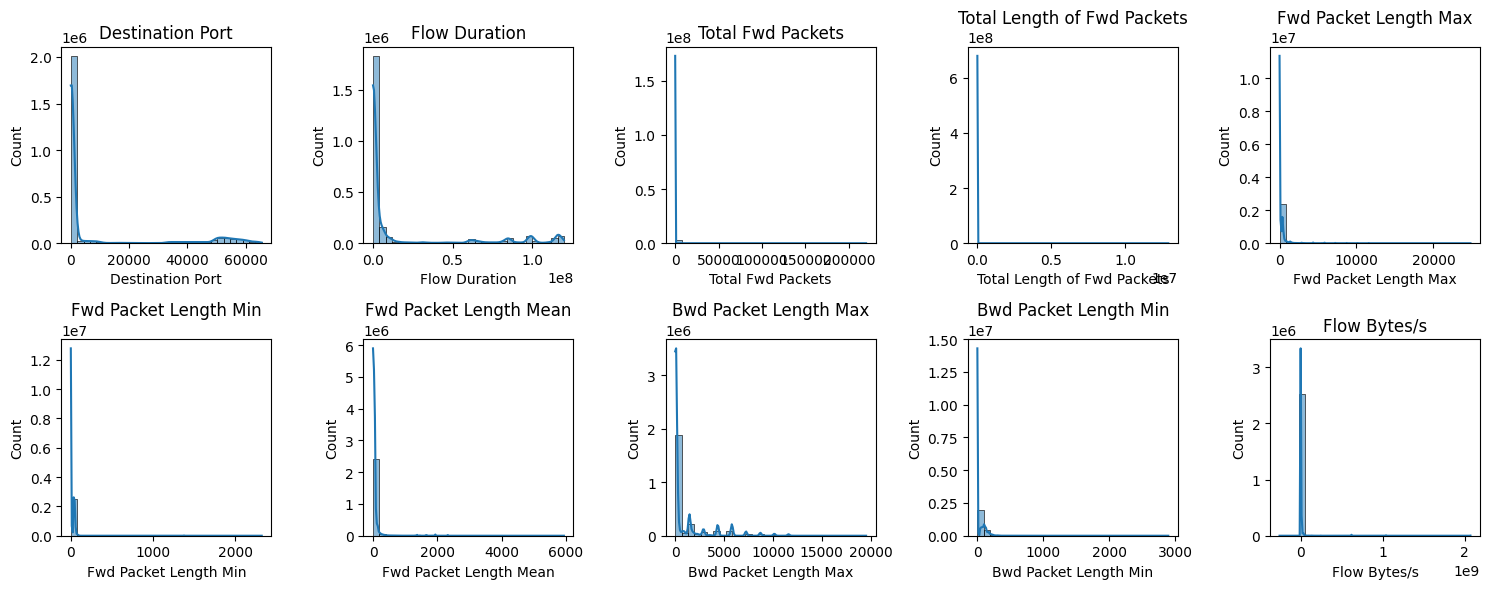

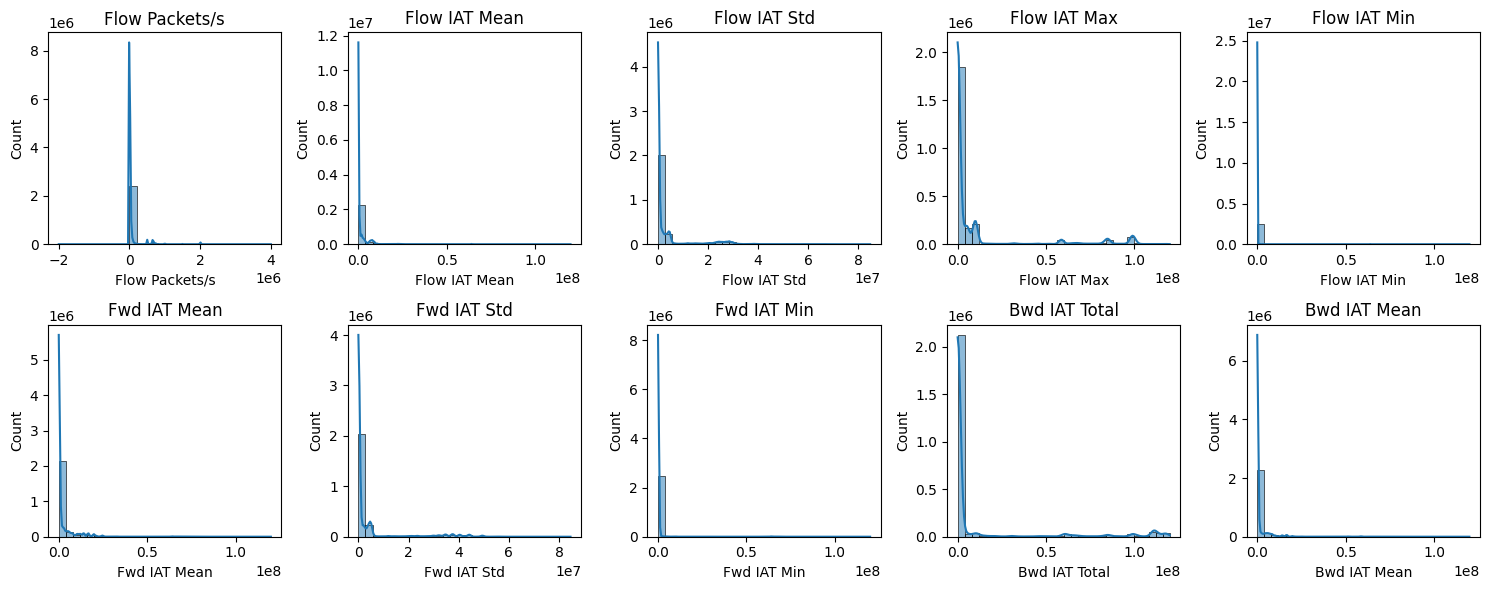

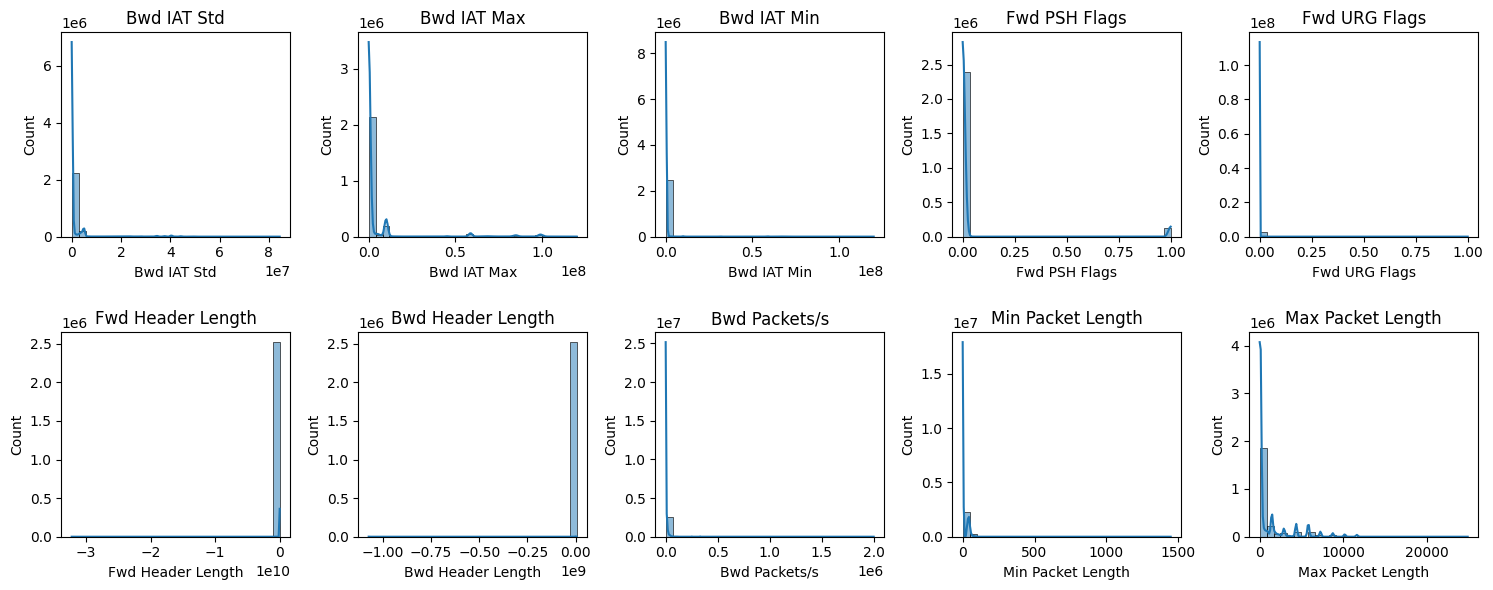

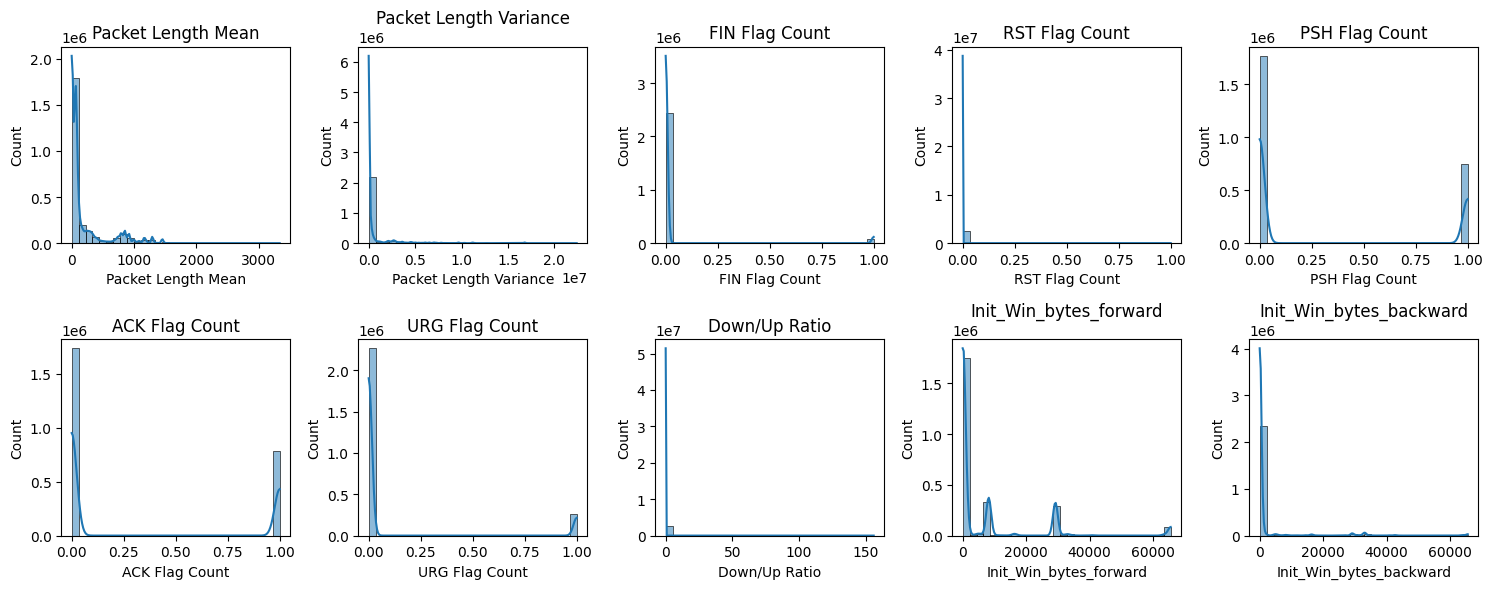

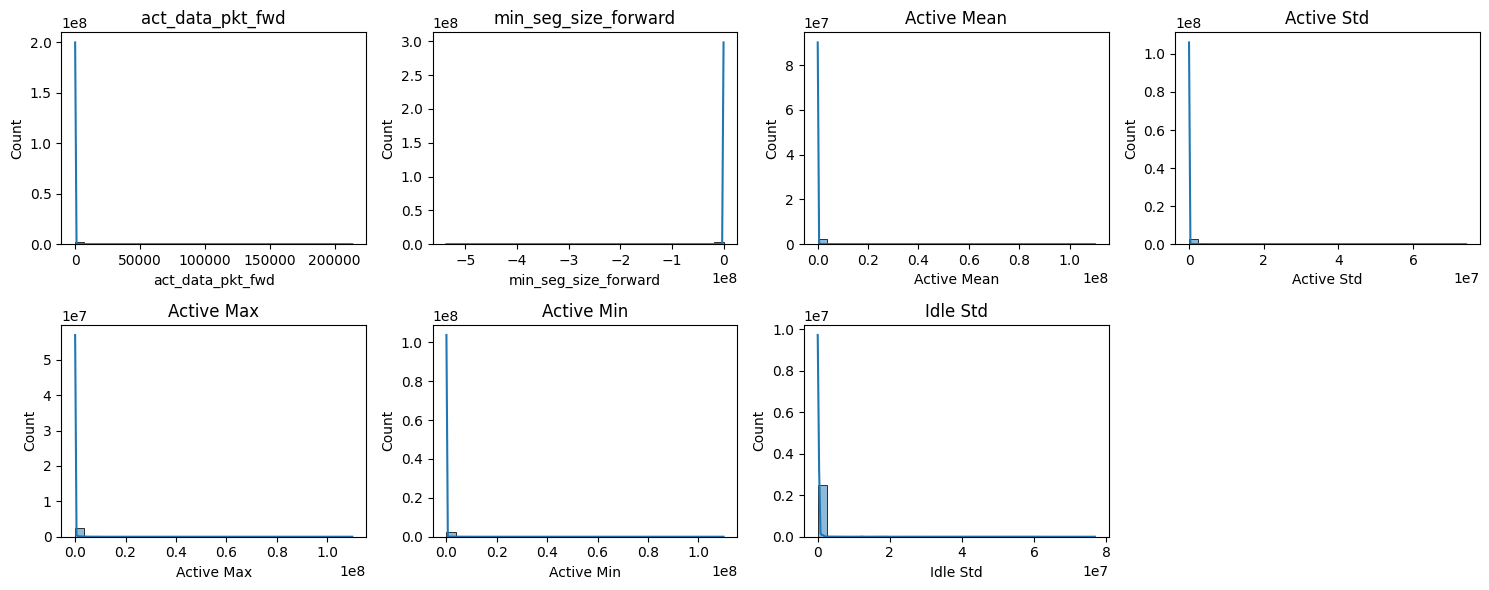

In [36]:
plot_histograms(X)

Notice that the data is not normally distributed at all. There are also many outliers in most of the features. 

# EDA Conclusion

1) The data has a massive imbalance in terms of class distribution. There are many approaches to handle the imbalance like undersampling, oversampling, and balancing techniques. These approaches should be explored in training. 

2) We have filtered the features from 79 features originally to 48 features. If the model still needs more feature selection to train well then we will filter the features even more.

3) The data is very skewed with many outliers. Therefore, when scaling the data for training, we should use a scaler that is not affected much by outliers like RobustScaler(). 

# Building Data Cleaning Pipeline

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class DataCleaningPipeline(BaseEstimator, TransformerMixin):
    final_features = ['Destination Port', 'Flow Duration', 'Total Fwd Packets',
                      'Total Length of Fwd Packets', 'Fwd Packet Length Max',
                      'Fwd Packet Length Min', 'Fwd Packet Length Mean',
                      'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
                      'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
                      'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min',
                      'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
                      'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length',
                      'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
                      'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance',
                      'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
                      'URG Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward',
                      'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
                      'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std']

    def __init__(self):
        # No need to pass features during instantiation, they are already a class constant
        pass
    
    def fit(self, X, y=None):
        # We don't need to fit anything, so just return self
        return self
    
    def transform(self, X):
        # Apply each step in sequence
        X = self._fix_column_names(X)
        X = self._drop_duplicates(X)
        X = self._replace_infinite_with_null(X)
        X = self._drop_nulls(X)
        X = self._filter_features(X)
        return X

    def _fix_column_names(self, df):
        return df.rename(columns=lambda col: col.strip())

    def _drop_duplicates(self, df):
        return df.drop_duplicates()

    def _replace_infinite_with_null(self, df):
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        return df

    def _drop_nulls(self, df):
        df.dropna(inplace=True)
        return df

    def _filter_features(self, df):
        return df[self.final_features]

final_features = ['Destination Port', 'Flow Duration', 'Total Fwd Packets',
                  'Total Length of Fwd Packets', 'Fwd Packet Length Max',
                  'Fwd Packet Length Min', 'Fwd Packet Length Mean',
                  'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
                  'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
                  'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min',
                  'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
                  'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length',
                  'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
                  'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance',
                  'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
                  'URG Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward',
                  'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
                  'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std']


## testing the pipeline

In [38]:
pipeline = DataCleaningPipeline()
original_data = original_data[~original_data[' Label'].isin(['Heartbleed', 'Infiltration'])]

cleaned_data = pipeline.fit_transform(original_data)
cleaned_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Std
0,22,1266342,41,2664,456,0,64.975610,976,0,7.595105e+03,...,1,29200,243,24,32,0.0,0.0,0,0,0.0
1,22,1319353,41,2664,456,0,64.975610,976,0,7.289937e+03,...,1,29200,243,24,32,0.0,0.0,0,0,0.0
2,22,160,1,0,0,0,0.000000,0,0,0.000000e+00,...,1,290,243,0,32,0.0,0.0,0,0,0.0
3,22,1303488,41,2728,456,0,66.536585,976,0,7.182268e+03,...,1,29200,243,24,32,0.0,0.0,0,0,0.0
4,35396,77,1,0,0,0,0.000000,0,0,0.000000e+00,...,2,243,290,0,32,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,112,28,28,28.000000,76,76,8.194940e+03,...,0,-1,-1,3,20,0.0,0.0,0,0,0.0
2830739,53,324,2,84,42,42,42.000000,181,181,1.376543e+06,...,1,-1,-1,1,20,0.0,0.0,0,0,0.0
2830740,58030,82,2,31,31,0,15.500000,6,6,4.512195e+05,...,0,1006,0,0,32,0.0,0.0,0,0,0.0
2830741,53,1048635,6,192,32,32,32.000000,128,128,4.272221e+02,...,0,-1,-1,5,20,0.0,0.0,0,0,0.0


In [39]:
data_X = data[final_features]
data_X

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Std
0,22,1266342,41,2664,456,0,64.975610,976,0,7.595105e+03,...,1,29200,243,24,32,0.0,0.0,0,0,0.0
1,22,1319353,41,2664,456,0,64.975610,976,0,7.289937e+03,...,1,29200,243,24,32,0.0,0.0,0,0,0.0
2,22,160,1,0,0,0,0.000000,0,0,0.000000e+00,...,1,290,243,0,32,0.0,0.0,0,0,0.0
3,22,1303488,41,2728,456,0,66.536585,976,0,7.182268e+03,...,1,29200,243,24,32,0.0,0.0,0,0,0.0
4,35396,77,1,0,0,0,0.000000,0,0,0.000000e+00,...,2,243,290,0,32,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,112,28,28,28.000000,76,76,8.194940e+03,...,0,-1,-1,3,20,0.0,0.0,0,0,0.0
2830739,53,324,2,84,42,42,42.000000,181,181,1.376543e+06,...,1,-1,-1,1,20,0.0,0.0,0,0,0.0
2830740,58030,82,2,31,31,0,15.500000,6,6,4.512195e+05,...,0,1006,0,0,32,0.0,0.0,0,0,0.0
2830741,53,1048635,6,192,32,32,32.000000,128,128,4.272221e+02,...,0,-1,-1,5,20,0.0,0.0,0,0,0.0


In [40]:
cleaned_data.equals(data_X)

True

# Saving cleaned data

In [41]:
PATH = "/kaggle/working/cleaned_data.csv"
data.to_csv(PATH, index=False)